## Report 2
#### Rui Shi

### 1. Introduction

Road safety is importent to everyone and relevant to everybody's daily life. New York city, as one of the busiest and the most crowded cities in the world, needs to be paid more attention to its road safety status. By analysising NYC past collision history, we can learn from the data and better avoid and prevent collisions. To ensure the accuracy of the analysis, the data from 2018 was used. In this report, the time factor, borough factor and car type factor were taken into consideration. Moreover, the influence of population and holidays were also analysised. 

### 2. Clean data

The dataset is very large which contains data from ten years ago to today. This analysis was focused on comparing accident rate between different boroughs and vehicle types and making prediction. Thus one year data is enough. To ensure the result is up to date, data from 2018 was choosen to do further analysis. 
The first step is to extract data from 2018 from the dataset. Then, to make comparision between different boroughs, rows that didn't show borough information was deleted. 

Since the data is very large and took a long time to download, for this report, the cleaned data was directly used and data from 2018 was extracted from the origin data by using function "filterByDate" and "filterByYear". As shown below, this data contains date, time, borough, vehicle type and a lot other related information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice
import seaborn as sns

url = 'https://github.cs.tufts.edu/raw/bgong01/NYC_DATA/master/traffic2018.csv?token=AAACghkiPVezeyjRhISXbB34YAMG6Kupks5cxlQLwA%3D%3D'
trafficData = pd.read_csv(url, dtype={'ZIP CODE': str, 'VEHICLE TYPE CODE 1': str}, parse_dates=['DATE'])


In [2]:
cleanData = trafficData[trafficData['BOROUGH'].isna() != True]
def filterByDate(data, startDate, endDate):
    mask = (data['DATE'] > startDate) & (data['DATE'] <= endDate)
    return data[mask]

def filterByYear(data, year):
    startDate = '%d-1-1' % year
    endDate = '%d-12-31' % year
    return filterByDate(data, startDate, endDate)
data2018 = filterByYear(cleanData, 2018)

In [3]:
data2018.head()

,Unnamed: 0,Unnamed: 0.1,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,30730,47441,2018-12-31,0:00,BRONX,10472.0,40.826336,-73.877716,"(40.826336, -73.877716)",NaN,...,Unspecified,NaN,NaN,NaN,4055273,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,30731,47442,2018-12-31,0:00,BROOKLYN,11249.0,40.701230,-73.958360,"(40.70123, -73.95836)",NaN,...,Unspecified,NaN,NaN,NaN,4055449,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,30732,47443,2018-12-31,0:00,MANHATTAN,10026.0,40.801346,-73.948105,"(40.801346, -73.948105)",NaN,...,Unspecified,NaN,NaN,NaN,4055005,Van,Sedan,NaN,NaN,NaN
3,30733,47444,2018-12-31,0:00,QUEENS,11435.0,40.709408,-73.817604,"(40.709408, -73.817604)",NaN,...,NaN,NaN,NaN,NaN,4055499,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,30734,47445,2018-12-31,0:00,STATEN ISLAND,10305.0,40.593370,-74.089300,"(40.59337, -74.0893)",SOUTH RAILROAD AVENUE,...,Driver Inattention/Distraction,NaN,NaN,NaN,4055512,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


### 3. Collisions by boroughs in NYC

#### 3.1 Overview

To make comparision, the "BOROUGH" column was extracted. By using value_counts( ) method, the number of accidents happened in different boroughs was shown. As shown in the count result, Brooklyn was the brough where most car accidents happened.

In [4]:
borough = data2018['BOROUGH']
borough.value_counts()

BROOKLYN         47173
QUEENS           41170
MANHATTAN        31357
BRONX            22991
STATEN ISLAND     6160
Name: BOROUGH, dtype: int64

To better see the comparison, the bar plot was used to visualize the counts.

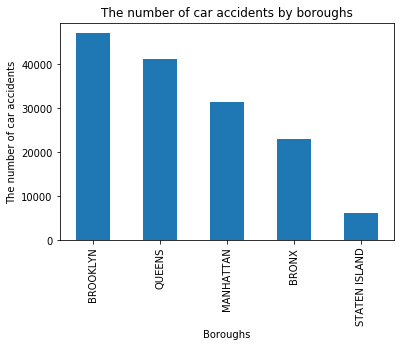

In [5]:
borough.value_counts().plot(kind = 'bar')
plt.title("The number of car accidents by boroughs")
plt.ylabel('The number of car accidents')
plt.xlabel('Boroughs')
plt.show()

#### 3.2 The collision density by boroughs

According to previous analysis we can see that the Brooklyn was the borough where the biggest amount of collisions happened in 2018. However the acreage of broughs has not been cosidered. Thus, by merging the boroughs area data, the further analysis related to the collision density was done. 

As we can see from the areaData, this data include all boroughs area of NYC. 

In [6]:
url = 'https://github.cs.tufts.edu/raw/bgong01/NYC_DATA/master/acreage.csv?token=AAACghoY8lwhCb1hLz9NPXpi8YNgej4Mks5cxxt_wA%3D%3D'
areaData = pd.read_csv(url)
areaData

,Borough,Area
0,BRONX,57.00
1,BROOKLYN,97.00
2,MANHATTAN,33.58
3,STATEN ISLAND,102.50
4,QUEENS,108.10


The total number of collisions related to boroughs was calculated and extracted from the origin data. Then the Area data was merged to the right according to borough. 

In [7]:
borough = data2018[['BOROUGH']][:]
borough['count'] = [1]*len(borough)
group_sumb = borough.groupby(['BOROUGH'])['count'].sum().reset_index()
mergeGroup = group_sumb.merge(areaData, left_on = "BOROUGH", right_on = "Borough")

A graph that show the car collision density by boroughs was shown below. The y axis was the number of collisions per acreage, and the x axis was the borough information. As we can see from the bar graph, the result was different from the last one. When considering the car collision density, Manhattan became the borough which had the largest collision density since this borough is a relatively small area. 

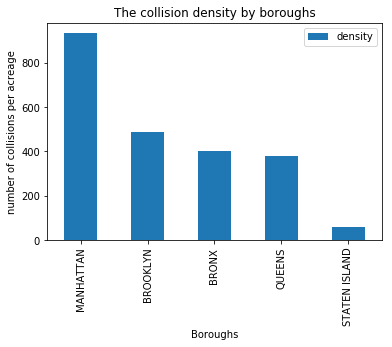

In [8]:
for i in range(len(mergeGroup)):
    mergeGroup.at[i,'density'] = mergeGroup['count'][i]/mergeGroup['Area'][i]
mergeGroup = mergeGroup.sort_values(by=['density'], ascending = False)
mergeGroup[['BOROUGH', 'density']].plot(kind = 'bar',x = "BOROUGH")
plt.title("The collision density by boroughs")
plt.ylabel('number of collisions per acreage')
plt.xlabel('Boroughs')
plt.show()

#### 3.3 Time factor

#### 3.3.1 Hour factor

The "TIME" column in the data shows the collisions by hour of a day. By using this plot, we can find out hours when most car accidents happened and the difference between the number of collisions happened in different boroughs at the same hour. The time information in the data was down to minute. To make clearer comparison, the time was round to hour.

In [9]:
for i in range(len(data2018)):
    times = data2018['TIME'][i].split(":")
    mins = int(times[1])
    if mins > 30:
        hour = int(times[0])+1
    else:
        hour = int(times[0])
    data2018.at[i, 'TIME'] = hour
group = pd.DataFrame(data2018[['BOROUGH', 'TIME']])
group['count'] = [1]*len(group)
group_sum = group.groupby(['BOROUGH', 'TIME'])['count'].sum()

The heatmap was used to present the result. As shown in the plot, the total number of collisions happened between 2pm to 6pm ("rush hour") was the biggest. In the same time range, the number of collisions happened in Brooklyn was the largest, 3 to 5 times more than other boroughs. Moreover, We can see from the plot that besides the "rush hour", the number of collisons reached a peak at 0am. 

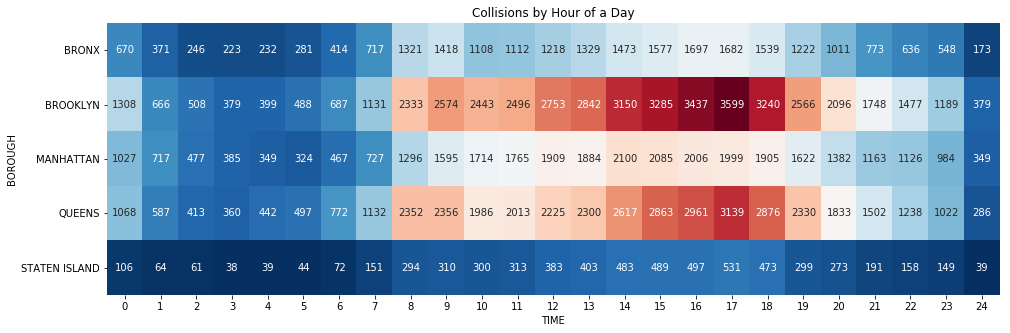

In [10]:
plt.figure(figsize = (16,5))
ax = plt.axes()
sns.heatmap(group_sum.unstack(),annot=True, cbar=False, 
            fmt='.0f', cmap='RdBu_r')
ax.set_title('Collisions by Hour of a Day')
plt.show()

#### 3.3.2 Month factor

To undurstand the relation between collision trend and month factor, a line graph that showed the trend of collisions by month and boroughs was plotted.

The month information for every collision was extracted from the "DATE" column and listed as a new column "month". Then the "BOROUGH" and "month" column were extracted from the origin data for further analysis. The total number of collisions for every month and borough was caclulated.

In [11]:
for i in range(len(data2018)):
    mon = data2018['DATE'][i].month
    data2018.at[i, 'month'] = int(mon)
group = pd.DataFrame(data2018[['BOROUGH', 'month']])
group['count'] = [1]*len(group)
new_group = group.groupby(['BOROUGH', 'month'])['count'].sum().reset_index()
lineGroup = {}
for i in range(len(new_group)):
    if new_group['BOROUGH'][i] not in lineGroup:
        lineGroup[new_group['BOROUGH'][i]] = [new_group['count'][i]]
    else:
        lineGroup[new_group['BOROUGH'][i]].append(new_group['count'][i])

The line graph of the number of collisions by month was shown below. We can see from the graph that the trend for boroughs was basiclly similar. There was a increasing trend of collisions from Janurary to May and reach a peak in May. Then the number of collisions gradually decreased from May to December.

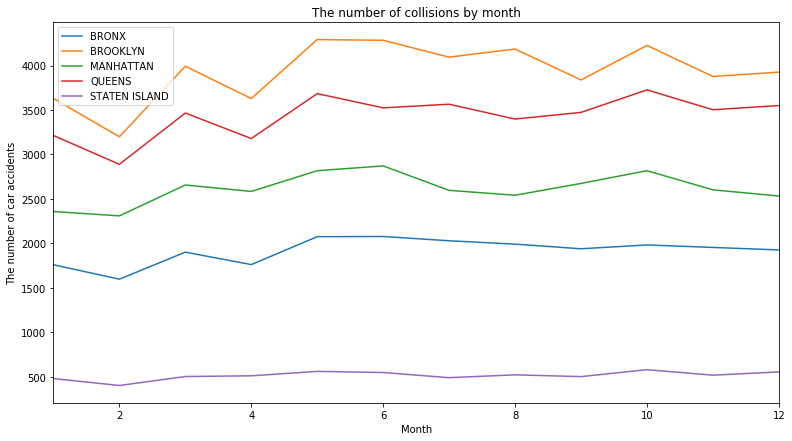

In [12]:
set_index = [i for i in range(1,13)]
df = pd.DataFrame(lineGroup, index = set_index)
d = df.plot.line(figsize=(13,7))
plt.title('The number of collisions by month')
plt.ylabel('The number of car accidents')
plt.xlabel('Month')
plt.show()

### 4. The influence of holidays

The number of collisions might have relation with holiday. Few days before holiday, people more likely to go shopping and prepare for the holiday. During the holiday, people may prefer staying at home which means less car on road and maybe less collisions. To understand the influence of holiday, the number of collisions before, during and after the holiday was extracted and analysised for every federal holiday. The holiday data include holidays from 2012 to 2018, since this report focused on data from 2018, the 2018 holiday data was extracted by using filterByYear and filterByDate functions.

In [13]:
url = 'https://support.sisense.com/hc/article_attachments/215011168/US%20Bank%20Holidays%202012-2020.csv'
holidayData = pd.read_csv(url,parse_dates=['Date'])
holidayData.head()


,SN,Date,Holiday,Bank Holiday
0,1,2012-01-02,New Year Day,True
1,2,2012-01-16,Martin Luther King Jr. Day,True
2,3,2012-02-20,Presidents Day (Washingtons Birthday),True
3,4,2012-05-28,Memorial Day,True
4,5,2012-07-04,Independence Day,True


In [14]:
def filterByDate(data, startDate, endDate):
    mask = (data['Date'] > startDate) & (data['Date'] <= endDate)
    return data[mask]

def filterByYear(data, year):
    startDate = '%d-1-1' % year
    endDate = '%d-12-31' % year
    return filterByDate(data, startDate, endDate)
holiday2018 = filterByYear(holidayData, 2018)


The "DATE" column was extracted from the initial data and sum up collisions by date. The "count" column was added to the data to show the total number of collisions happened in certain date. Then the holiday data was merged with new_group data to show which date is holiday. As shown in the head of the new merged data, the "Holiday" column shows "NaN" if the day is not a holiday and the holiday name if the day is a holiday.

In [15]:
group = pd.DataFrame(data2018[['DATE']])
group['count'] = [1]*len(group)
new_group = group.groupby(['DATE'])['count'].sum().reset_index()
newData = new_group.merge(holiday2018, left_on = "DATE", right_on = "Date", how = "outer")
newData.head()


,DATE,count,SN,Date,Holiday,Bank Holiday
0,2018-01-02,422,NaN,NaT,NaN,NaN
1,2018-01-03,419,NaN,NaT,NaN,NaN
2,2018-01-04,292,NaN,NaT,NaN,NaN
3,2018-01-05,484,NaN,NaT,NaN,NaN
4,2018-01-06,375,NaN,NaT,NaN,NaN


After getting the merged data, the number of collisions of date that in the range of three days before holiday to three days after holiday was extracted and recorded in a dictionary with the name of holiday as the key.

In [16]:
label = []
holidayAcc = {}
for i in range(len(newData)):
    if not pd.isna(newData['Holiday'][i]):
        holidayAcc[newData['Holiday'][i]] = newData['count'][i-3:i+4].values.tolist()


By changing the dictionary to a data frame and ploted it, the influence of holidays to the number of collisions can be seen clearly. As shown in the line graph, the number of collisions reached peak one day before and after holiday, and the collision number reach the lowest point during holiday. This result matched with the common sense, people tend to drive more before and after holiday, and prefer to stay at home during the holiday which leads to the minimum number of collisions.

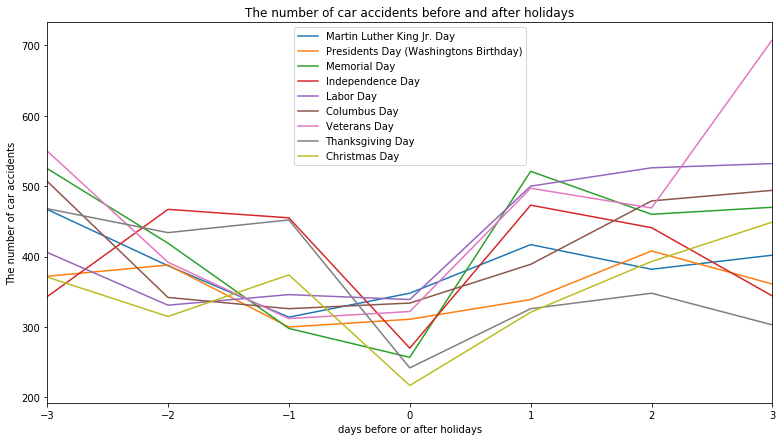

In [17]:
set_index = [i for i in range(-3,4)]
df = pd.DataFrame(holidayAcc, index = set_index)
d = df.plot.line(figsize=(13,7))
plt.title('The number of car accidents before and after holidays')
plt.ylabel('The number of car accidents')
plt.xlabel('days before or after holidays')
plt.show()

### 5. The influence of population

According to the result from the comparion of the number of car accidents between boroughs, the ranking is very close to the ranking of population. To analysis the correlation between car accidents and population, the NYC population dataset was merged in.

In [18]:
population = pd.read_csv("https://data.cityofnewyork.us/resource/xywu-7bv9.csv")

The population dataset has a record or prediction of population in NYC for every ten years from 1950 to 2040. Since the data that was used to analysis car accidents was from 2018 and the closest data should be used to ensure accuracy, the population from 2020 was choosen.

To better make comparison, a decending order was used to present the ranking. As shown in the plot, the ranking of population in 2020 was same with the ranking of the number of car accidents.

/Users/rui/.pyenv/versions/3.7.0/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <BarContainer object of 5 artists> has a label of '_2020_boro_share_of_nyc_total' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


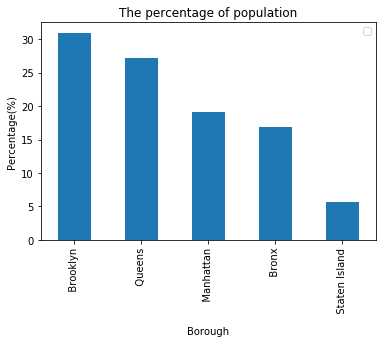

In [19]:
pData = pd.DataFrame(population).iloc[1:6]
pop2018 = pData[["_2020_boro_share_of_nyc_total", "borough"]]
pop2018 = pop2018.sort_values(by=['_2020_boro_share_of_nyc_total'], ascending = False)
pop2018.plot(kind = 'bar', x = "borough")
plt.title("The percentage of population")
plt.ylabel('Percentage(%)')
plt.xlabel('Borough')
plt.show()

To show the correlation more clearer, a percentage of car accidents column was added in the car accidents dataset.

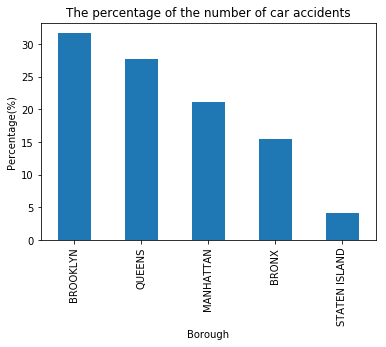

In [20]:
borough = data2018['BOROUGH']
counts = pd.DataFrame(borough.value_counts())
counts['accident_perc']= counts['BOROUGH']/counts['BOROUGH'].sum()*100
counts['accident_perc'].plot(kind = 'bar')
plt.title("The percentage of the number of car accidents")
plt.ylabel('Percentage(%)')
plt.xlabel('Borough')
plt.show()

To show the car accident rate and borough population in one plot, two columns were combined. As shown in the plot, the ranking is the same with small difference in the proportion. This result showed that population can influence the rate of car accident to some extent. Large population and population density may lead to more car accidents.

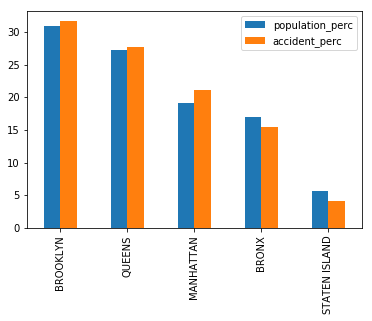

In [21]:
pop = pop2018["_2020_boro_share_of_nyc_total"].reset_index()
counts['population_perc'] = list(pop["_2020_boro_share_of_nyc_total"])
counts[['population_perc', 'accident_perc']].plot(kind = 'bar')

### 5. The influence of car type

The vehicle type column used different names represent same car type. For example, "sport utility / station wagon" and "station wagon/sport utility vehicle" both represent suv, "pick-up" and "puck-up truck" both represent box truck. Thus, the dictionary "carMap" was built to allocate car type for different names. This dictionary was used to change the vehicle type of all rows. The function "unityVehicleType" was built to loop through all rows to change corresponding name of the car type.

In [22]:
carMap = {"passenger vehicle": "passenger vehicle","sport utility / station wagon": "suv","sedan": "sedan","station wagon/sport utility vehicle": "suv","taxi": "taxi","pick-up truck": "pick-up","box truck": "truck","bus": "bus","tk": "truck","bu": "bus","motorcycle": "motorcycle","bike": "bike","van": "van","bicycle": "bike","tractor truck diesel": "tractor","vn": "van","convertible": "convertible","dump": "garbage truck","pk": "pick-up","ambulance": "ambulance","garbage or refuse": "truck","conv": "convertible","am": "ambulance","flat bed": "flat bed","carry all": "carry all","ambul": "ambulance","gg": "convertible","tractor truck gasoline": "tractor","fb": "van","tow truck / wrecker": "tow truck","ll": "convertible","tr": "truck","moped": "moped","motorscooter": "scooter","tanker": "tanker","chassis cab": "truck","trail": "tow truck","concrete mixer": "concrete mixer","truck": "truck","fire": "fire truck","refrigerated van": "refrigerated van","fire truck": "fire","cb": "taxi","motorbike": "motorcycle","armored truck": "armored truck","fdny": "fire truck","flat rack": "flat rack","tract": "tow truck","3-door": "hatchbacks","beverage truck": "beverage truck","fr": "fire truck","schoo": "school bus","elect": "electric car","usps": "delivery truck","tow t": "tow truck","scoot": "scooter","4 dr sedan": "sedan","forkl": "forkl","lift boom": "lift boom","utili": "suv","pedicab": "pedicab","deliv": "delivery truck","3d": "hatchbacks","firet": "fire truck","box t": "truck","school bus": "school bus","amb": "ambulance","motor": "motorcycle","ambu": "ambulance","freig": "refrigerated van","snow plow": "snow plow","uhaul": "truck","flat": "flat bed","garba": "garbage truck","mail": "delivery truck","tow": "tow truck","picku": "pick-up","suv": "suv","scooter": "scooter","2 dr sedan": "sedan","delv": "delivery truck","ups t": "delivery truck","scoo": "scooter","fedx": "delivery truck","mini": "minivan","horse": "horse","bicyc": "bike","dumps": "garbage truck","wagon": "suv","uhual": "truck","passa": "passenger vehicle","pick-": "pick-up"}

In [23]:
def unityVehicleType(data, typeMap):
    for i in range(len(data.index)):
        if pd.isna(data['VEHICLE TYPE CODE 1'][i]):
            continue
        typeName = data['VEHICLE TYPE CODE 1'][i].lower()
        if typeName in typeMap:
            typeName = typeMap[typeName]
        data.at[i, 'VEHICLE TYPE CODE 1'] = typeName
    return data
data2018 = unityVehicleType(data2018, carMap)
data2018 = data2018[data2018['VEHICLE TYPE CODE 1'] != ""]

There were around 100 car types in the dataset and most of them only related to 1 car accident. So the car types that has less that 100 related car accidents were deleted to better show the result. 

In [24]:
vehicle = data2018['VEHICLE TYPE CODE 1']
vtype = vehicle.value_counts().to_frame().reset_index()
vtype.columns = ['type', 'count']
vtype = vtype[vtype['count']>100]
vtype

,type,count
0,suv,52356
1,sedan,46113
2,passenger vehicle,22810
3,taxi,7775
4,pick-up,4749
5,truck,3611
6,bus,2545
7,bike,1615
8,van,1243
9,motorcycle,773


A plot was made to visualize the result. We can see from the plot that the top ten car types that related to the largest number of collisions were SUV, sedan, passenger vehicle, taxi, pick-up, truck, bus, bike, van, and motocycle. Although SUV related to the largest amount of car accidents, it doesn't mean that SUV cars were more likely to have a collision. Since SUV was one of the most popular car type, more people tend to get SUV instead of other car type which leads to more SUV on the road. To also take the number of cars for every car type into cosideration, a new dataset need to be merged in.

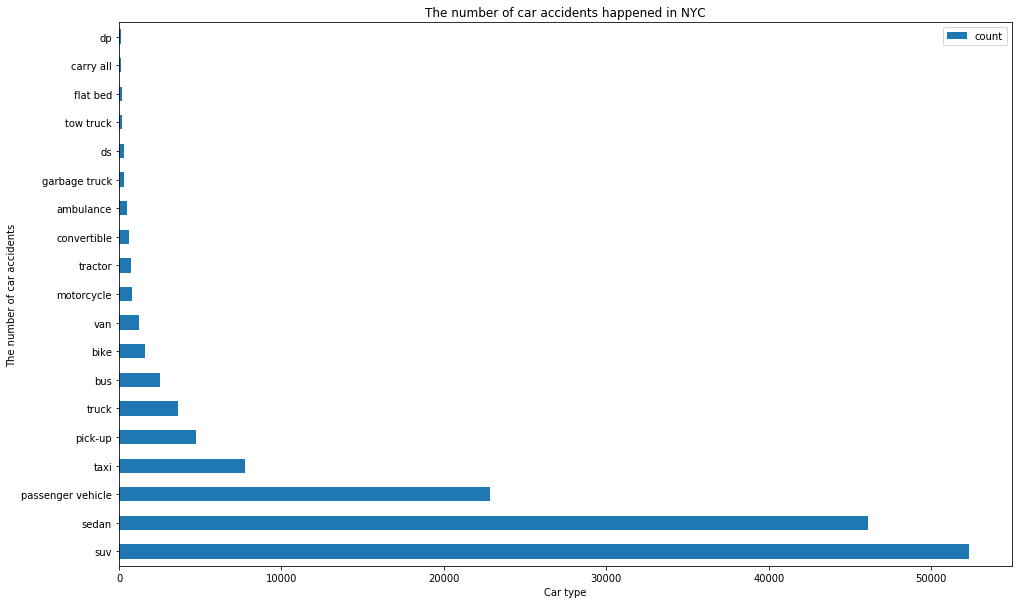

In [25]:
vtype.plot(kind = 'barh', figsize = (16,10), x ='type')
plt.title("The number of car accidents happened in NYC")
plt.ylabel('The number of car accidents')
plt.xlabel('Car type')
plt.show()

To take the total number of registered cars of related types into consideration, the dataset that recorded all vehicle registration information in New York State need to be merged. However, the dataset contains more than ten million rows and is too big to be merged with. Thus the downloadNYCRMV function was used to extract data of related car types from the origin dataset and record the number of registration cars for all related types. This function can return a dictionary that has the total number of registered cars of different types. There was a "typeConvert" dictionary that can help to convert different car type names to its uniform name. 

In [402]:
import collections
import urllib.parse
def downloadNYCRMV():
    url = 'https://data.ny.gov/resource/w4pv-hbkt.csv?'
    typeUrl = 'https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW YORK       &body_type=%s&$limit=10000000'
    classUrl = 'https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW YORK       &registration_class=%s&$limit=10000000'
    types = ['SEDN', 'SUBN', '4DSD', '2DSD', 'VAN ']
    classes = ['MOT', 'PAS']
    typeConvert = {'SEDN': 'sedan', 'SUBN': 'suv', '4DSD': 'sedan', '2DSD': 'sedan', 'TR/C': 'truck', 'SWT ': 'truck', 'PICK': 'pick-up', 'VAN ': 'van', 'MOT': 'motorcycle', 'PAS': 'passenger vehicle'}
    typeMap = collections.defaultdict(int)
    for t in types:
        query = {'city': 'NEW YORK       ', '$limit': '10000000'}
        print('Type: %s' % t)
        query['body_type'] = t
        rUrl = url + urllib.parse.urlencode(query)
        print(rUrl)
        data = pd.read_csv(rUrl)
        typeMap[typeConvert[t]] += len(data)
    for c in classes:
        query = {'city': 'NEW YORK       ', '$limit': '10000000'}
        print('Type: %s' % c)
        query['registration_class'] = c
        rUrl = url + urllib.parse.urlencode(query)
        print(rUrl)
        data = pd.read_csv(rUrl)
        typeMap[typeConvert[c]] += len(data)
    return typeMap
typeMap = downloadNYCRMV()

Type: SEDN
https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW+YORK+++++++&%24limit=10000000&body_type=SEDN
Type: SUBN
https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW+YORK+++++++&%24limit=10000000&body_type=SUBN
Type: 4DSD
https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW+YORK+++++++&%24limit=10000000&body_type=4DSD
Type: 2DSD
https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW+YORK+++++++&%24limit=10000000&body_type=2DSD
Type: VAN 
https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW+YORK+++++++&%24limit=10000000&body_type=VAN+
Type: MOT
https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW+YORK+++++++&%24limit=10000000&registration_class=MOT
Type: PAS
https://data.ny.gov/resource/w4pv-hbkt.csv?city=NEW+YORK+++++++&%24limit=10000000&registration_class=PAS


Below showed the return dictionary of the downloadNYCRMV function. The keys were car types and the values were the number of cars for each type.

In [403]:
typeMap

defaultdict(int,
            {'sedan': 84941,
             'suv': 122615,
             'van': 8153,
             'motorcycle': 7637,
             'passenger vehicle': 195845})

By using the total number of registered cars of every type, the car accident rate was calculated for each car type. A new column was added to the car accidents rate. The modified data was shown below. 

In [404]:
types = ["suv", "sedan", "van", "motorcycle", "passenger vehicle"]
carType = vtype[vtype["type"].isin(types)].reset_index()
carType = carType[['type', 'count']]
for i in range(len(carType)):
    carType.at[i,'rate'] = carType['count'][i]/typeMap[carType['type'][i]]
carType

,type,count,rate
0,suv,52356,0.426995
1,sedan,46113,0.542883
2,passenger vehicle,22810,0.116470
3,van,1243,0.152459
4,motorcycle,773,0.101218


Two graphs were ploted below. One is the plot of the number of collisions by car type, the other one is the collision rate by every car type. As shown in the plots, the order of car type for two plots were different. After taking the total registered number into consideration, SUV was no longer the car type that related with the biggest number of collisions. Instead, sedan became the car type that had highest car accident rate. Also, the order of passenger vehicle and van was changed.

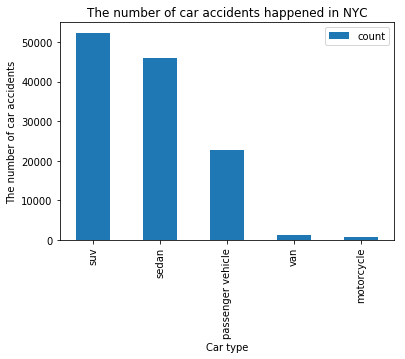

In [405]:
carType[['count','type']].plot(kind = 'bar', x ='type')
plt.title("The number of car accidents happened in NYC")
plt.ylabel('The number of car accidents')
plt.xlabel('Car type')
plt.show()

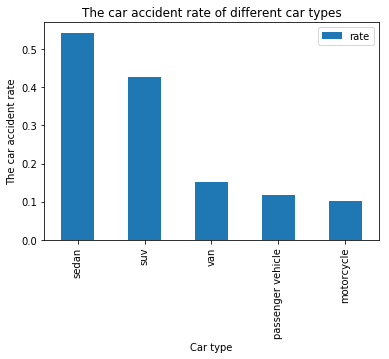

In [406]:
carTypePerc = carType[['rate','type']].sort_values(by = ['rate'], ascending = False)
carTypePerc[['rate','type']].plot(kind = 'bar', x ='type')
plt.title("The car accident rate of different car types")
plt.ylabel('The car accident rate')
plt.xlabel('Car type')
plt.show()